# **Анализ Telegram-чата и тональности сообщений игроков Pokemon Go (поиск инсайтов, составление рекомендаций стейкхолдерам)**

Игра Pokemon Go была официально анонсирована в России 11 сентября 2018 года, однако играть в нее стало возможным с июля 2016 года.
Являясь совместной разработкой компаний Nintendo и Niantic, игра была разработана на базе достопримечательностей из игры Ingress(от Niantic), которая в России появилась ещё в далёком 2013 году. Реальные объекты (достопримечательности) становились добавлялись игроками в Ingress? а позже, уже в Pokemon Go, они стали точками добычи ресурсов для игры (PokeStop) и тренировочными залами (Gym).

Игра, кроме непосредственной ловли покемонов (с привязкой к геолокации) предполагает взаимодействие игроков, в том числе:
*   Обмен пойманными покемонами, подарками
*   Совместные рейды в тренировочных залах
*   Сражения покемонов (механика PvP)
*   Дружба (разделена на уровни, увеличивающиеся в зависимости от количества взаимодействия игроков - обмен подарками, совместные рейды)

Механизм взаимодействия игроков был добавлен в игру в 2018 году.
С целью поиска "друзей" для совместной игры, на всевозможных площадках, ресурсах и в социальных сетях создавались сообщества игроков.

В качестве базы для анализа у нас есть телеграмм-сообщество игроков из Санкт-Петербурга. Небольшое сообщество на уровне района, большая часть участников знакомы лично или по-крайней мере встречались во время рейдов в Gym'ах.

*    Сообщество было создано 2017-07-31
*    История сообщений была выгружена 2023-12-19
*    Игра перестала работать в России 2022-03-11

Для удобства, в чате присутствуют двя телеграмм-бота, через которых участники создавали "голосовалки" для сбора на рейд.

**Цель анализа:**

1. Проанализировать, как изменилось общение в чате после ухода игры, когда по сути игроков перестало что-то связывать.
2. Определить ТОП - пользователей (авторов позитивных и нешативных)
3. Сформулировать рекомендации стейкхолдерам на основе анализа.

**Этапы работы:**

1. Загрузка данных
2. Подготовка и преобразование данных
3. Определение частотного распределения слов
4. Анализ сообщений: библиотека Dostoevsky
5. Анализ сообщений: библиотека transformers
6. Метрики качества
7. Дополнительный: анализ сообщений ботов
8. Выводы и рекомендации



---



# Установка библиотек и модулей

In [ ]:
!pip install telethon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.9/576.9 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for telethon: filename=Telethon-1.34.0-py3-none-any.whl size=649201 sha256=03ef5180f0b942cbd2a64dc75bb6e2c81a60b0b5385e7696cc3276f0019595c8
  Stored in directory: /root/.cache/pip/wheels/d5/28/56/edfb090fbbcd57add61a49dfe194c8eff22b5d4828008f2e62
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=33d754ccbd01245965f5b09495e0aa9572e7f45af7888dbcc4c60e594559f4d4
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built telethon pyaes


In [ ]:
!pip install nest_asyncio

In [ ]:
! pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 858.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d39e4b548484d5c93f4510c45463c24b06baae05f0adfaa822ce7eb5720ba132
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
! pip install swifter   #пытаемся ускорить работу apply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=686d9a3cddb3eccd6621aafadadf74c836b03ff43e09e7a9b2635503eb8615f5
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
! pip install dostoevsky

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=03cb93038fb1cee4ee6bd0d70e92b21002513e61eb735b7b547c84fdd0722519
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
! python -m dostoevsky download fasttext-social-network-model

In [ ]:
! pip install transformers

In [ ]:
!pip install plotly

In [ ]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
! pip install raceplotly

In [ ]:
import pandas as pd
import numpy as np
import configparser as cf
import json
from telethon.sync import TelegramClient
from datetime import date, datetime
from telethon.tl.functions.channels import GetParticipantsRequest
from telethon.tl.types import ChannelParticipantsSearch
from telethon.tl.functions.messages import GetHistoryRequest
import nest_asyncio
import re
import os
from google.colab import drive
import string
import swifter
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from wordcloud import WordCloud
from ast import literal_eval
from datetime import date, datetime
import nltk
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from PIL import Image
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
from transformers import pipeline
from transformers import BertTokenizerFast
import emoji
from raceplotly.plots import barplot
from math import *

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Этап 1: Загрузка данных

Первым этапом работы необходимо выгрузить историю чата из телеграмм. Для этого вользуемся библиотекой Telethon

Данные для авторизации сохраним в config.ini

In [ ]:
config = cf.ConfigParser()
config.read("config.ini")

api_id   = config['Telegram']['api_id']
api_hash = config['Telegram']['api_hash']
username = config['Telegram']['username']

client = TelegramClient(username, api_id, api_hash)

client.start()

Определим функции для считывания и записи участников чата и истории сообщений. Функции записывают данные в формате json

In [ ]:
async def dump_all_participants(channel):
	user_num = 0
	limit_user = 100

	all_user = []
	filter_user = ChannelParticipantsSearch('')

	while True:
		participants = await client(GetParticipantsRequest(channel,
			filter_user, user_num, limit_user, hash=0))
		if not participants.users:
			break
		all_user.extend(participants.users)
		user_num += len(participants.users)

	all_users_details = []

	for participant in all_user:
		all_users_details.append({"id": participant.id,
			"first_name": participant.first_name,
			"last_name": participant.last_name,
			"user": participant.username,
			"phone": participant.phone,
			"is_bot": participant.bot})

	with open('channel_users.json', 'w', encoding='utf8') as outfile:
		json.dump(all_users_details, outfile, ensure_ascii=False)


async def dump_all_messages(channel):
	offset_msg = 0
	limit_msg = 100

	all_messages = []
	total_messages = 0
	total_count_limit = 0

	class DateTimeEncoder(json.JSONEncoder):
		""" Класс для записи дат в JSON """
		def default(self, o):
			if isinstance(o, datetime):
				return o.isoformat()
			if isinstance(o, bytes):
				return list(o)
			return json.JSONEncoder.default(self, o)

	while True:
		history = await client(GetHistoryRequest
      (peer=channel,
        offset_id=offset_msg,
        offset_date=None, add_offset=0,
        limit=limit_msg, max_id=0, min_id=0,
        hash=0)
      )
		if not history.messages:
			break
		messages = history.messages
		for message in messages:
			all_messages.append(message.to_dict())
		offset_msg = messages[len(messages) - 1].id
		total_messages = len(all_messages)
		if total_count_limit != 0 and total_messages >= total_count_limit:
			break

	with open('channel_messages.json', 'w', encoding='utf8') as outfile:
		 json.dump(all_messages, outfile, ensure_ascii=False, cls=DateTimeEncoder)

In [ ]:
async def main():      # Если вдруг понадобится сохранить сообщения другого чата
	url = input("Введите ссылку на канал или чат: ")
	channel = await client.get_entity(url)
	await dump_all_participants(channel)
	await dump_all_messages(channel)

In [ ]:
 nest_asyncio.apply()

In [ ]:
async with client:
  client.loop.run_until_complete(main())

Введите ссылку на канал или чат: https://t.me/+cfh9eBEfUFs5ODky


Сохраним сформированные файлы и продолжим работу загружая их. Файл с сообщениями достаточно много весит, поэтому принято решение оставить его на дсике.

# Этап 2: Подготовка и преобразование данных



In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Загрузим с диска список пользователей.

В полученном датафрейме присутствуют личные данные, поэтому возмем только 4 колонки (без phone и last_name):

*   id - id пользователя в чате
*   first_name - никнейм пользователя заданный через телеграм
*   user - никнейм пользователя
*   is_bot - является пользователь ботом
Удалим:
*   last_name - не у всех заполненно, Фамилия
*   phone - номер телефона. Так же не у всех, но персональная информация.

In [ ]:
df = pd.read_json('/content/gdrive/MyDrive/Аналитик_итоговый_проект/Рабочие файлы/channel_users.json')
df_user = df[['id', 'first_name', 'user', 'is_bot']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          115 non-null    int64  
 1   first_name  114 non-null    object 
 2   last_name   40 non-null     object 
 3   user        112 non-null    object 
 4   phone       9 non-null      float64
 5   is_bot      115 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 4.7+ KB


Составим список id ботов, чтобы в последующем отделять сообщения ботов от людей.

В нашем списке id тех ботов, которые были добавлены в чат на момент выгрузки,
однако в истории есть сообщения от ботов, которых удалили. Добавим ещё одного, которого точно уже нет 345381228 (экспертные данные автора)

In [ ]:
bot_list = df_user[df_user['is_bot'] == True]['id']
new = pd.Series(345381228)
bot_list = bot_list.append(new, ignore_index=True)

Загрузим с диска файл с сообщениями и обработаем его.



In [ ]:
df = pd.read_json('/content/gdrive/MyDrive/Аналитик_итоговый_проект/Рабочие файлы/channel_messages.json')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507546 entries, 0 to 507545
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   _                   507546 non-null  object             
 1   id                  507546 non-null  int64              
 2   peer_id             507546 non-null  object             
 3   date                507546 non-null  datetime64[ns, UTC]
 4   message             499776 non-null  object             
 5   out                 507546 non-null  bool               
 6   mentioned           507546 non-null  bool               
 7   media_unread        507546 non-null  bool               
 8   silent              507546 non-null  bool               
 9   post                507546 non-null  bool               
 10  from_scheduled      499776 non-null  float64            
 11  legacy              507546 non-null  bool               
 12  edit_hide       

В файле 33 колонки с информацией, для анализа все колонки не нужны.
Возмем следующие:
'' 'user_id', 'id', 'date','message', 'via_bot_id', 'media', 'entities'

*   _ - тип сообщения (обычное или сервисное)
*   id - номер сообщения
*   from_id	- json объект, содержащий id пользователя в чате
*   date - дата сообщения
*   message - текст сообщения
*   via_bot_id - id бота, через которого отправлено сообщение
*   entities - сущности. большой не нормализованный объект json с различной информацией

In [ ]:
# типы сообщений
df.groupby('_')['id'].count()

_
Message           499776
MessageService      7770
Name: id, dtype: int64

In [ ]:
df.iloc[0:5,0:15]

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,from_scheduled,legacy,edit_hide,pinned,noforwards
0,Message,520903,"{'_': 'PeerChannel', 'channel_id': 1089373694}",2023-12-19 06:36:18+00:00,,False,False,False,False,False,0.0,False,0.0,0.0,0.0
1,Message,520902,"{'_': 'PeerChannel', 'channel_id': 1089373694}",2023-12-18 18:24:13+00:00,,False,False,False,False,False,0.0,False,1.0,0.0,0.0
2,Message,520901,"{'_': 'PeerChannel', 'channel_id': 1089373694}",2023-12-18 08:28:37+00:00,💨 Коварный Гастли готовится по полной увлажнят...,False,False,False,False,False,0.0,False,1.0,0.0,0.0
3,Message,520900,"{'_': 'PeerChannel', 'channel_id': 1089373694}",2023-12-18 06:44:37+00:00,"А это у нас вчера в Кронштадте, говорят",False,False,False,False,False,0.0,False,0.0,0.0,0.0
4,Message,520899,"{'_': 'PeerChannel', 'channel_id': 1089373694}",2023-12-18 06:44:19+00:00,,False,False,False,False,False,0.0,False,0.0,0.0,0.0


In [ ]:
df = df[['_', 'from_id', 'id', 'date','message', 'via_bot_id', 'entities']]

План обработки:


*   В файле есть вложенные списки json объектов, которые не считываются сразу, их необходмо нормализовать
*   Разделим сообщения на сообщения от ботов и остальные сообщения, сообщения от ботов сохраним на диске отдельно
*   Для обработки сообщений возмем строки с непустыми message
*   Разделим данные на ДО ухода игры и ПОСЛЕ
*   Очистим тест сообщений от ссылок, символов, цифр, лишних пробелов и табуляций, а так же не кирилицы
*   Обработаем некоторые слова сообщений
*   Очищенные сообщения лемматизируем (добавим несколько стоп слов, а так же слова, которые не характеризуют общение и чаще всего писались отдельным сообщением во время игры)
*   Построим облака слов ДО и ПОСЛЕ



In [ ]:
df['entities'] = df['entities'].apply(json.dumps)
df= pd.concat([df, pd.json_normalize(df['entities'])], axis=1)
df= pd.concat([df, pd.json_normalize(df['from_id'])['user_id']], axis=1)

In [ ]:
df[df['message'].isna()]

,_,from_id,id,date,message,via_bot_id,entities,user_id
459,MessageService,"{'_': 'PeerUser', 'user_id': 273451622}",520443,2023-11-27 18:27:46+00:00,NaN,NaN,NaN,273451622.0
524,MessageService,"{'_': 'PeerUser', 'user_id': 273451622}",520377,2023-11-25 12:57:33+00:00,NaN,NaN,NaN,273451622.0
1143,MessageService,"{'_': 'PeerUser', 'user_id': 685074222}",519753,2023-11-07 18:37:02+00:00,NaN,NaN,NaN,685074222.0
4911,MessageService,"{'_': 'PeerUser', 'user_id': 273451622}",515972,2023-07-30 21:04:34+00:00,NaN,NaN,NaN,273451622.0
6552,MessageService,"{'_': 'PeerUser', 'user_id': 308058298}",514329,2023-06-18 18:29:31+00:00,NaN,NaN,NaN,308058298.0
...,...,...,...,...,...,...,...,...
507541,MessageService,"{'_': 'PeerUser', 'user_id': 376271610}",6,2017-07-31 18:05:48+00:00,NaN,NaN,NaN,376271610.0
507542,MessageService,"{'_': 'PeerUser', 'user_id': 376271610}",5,2017-07-31 18:05:22+00:00,NaN,NaN,NaN,376271610.0
507543,MessageService,"{'_': 'PeerUser', 'user_id': 308058298}",3,2017-07-31 17:53:32+00:00,NaN,NaN,NaN,308058298.0
507544,MessageService,"{'_': 'PeerUser', 'user_id': 308058298}",2,2017-07-31 17:52:58+00:00,NaN,NaN,NaN,308058298.0


Сообщения, где user_id отсутствует - 4 штуки, удалим.

Сервисные сообщения, где поле 'message' пустое - удалим.

Остальные сообщения разделим на сообщения от ботов и от участников чата.

In [ ]:
df_mes = df[['_', 'user_id', 'id', 'date','message', 'via_bot_id', 'entities']]
df_mes = df_mes.dropna(subset='user_id')
df_mes = df_mes.dropna(subset='message')
df_mes['user_id'] = df_mes['user_id'].apply(lambda x: int(x))
df_mes_from_bot = df_mes[(df_mes['user_id'].isin(bot_list)) | (df_mes['via_bot_id'].notna())]

df_mes = df_mes[~((df_mes['user_id'].isin(bot_list)) | (df_mes['via_bot_id'].notna()))]

In [ ]:
df_mes_from_bot = pd.concat([df_mes_from_bot, pd.json_normalize(df_mes_from_bot['entities'])], axis=1)

Пустые сообщения, содержащие только медиа контент в количестве 51843 шт.

In [ ]:
df_mes[df_mes['message'] == ''].count()

_             51843
user_id       51843
id            51843
date          51843
message       51843
via_bot_id        0
entities      51843
dtype: int64

In [ ]:
df_text = df_mes[df_mes['message'] != '']

In [ ]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435328 entries, 2 to 507533
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   _           435328 non-null  object             
 1   user_id     435328 non-null  int64              
 2   id          435328 non-null  int64              
 3   date        435328 non-null  datetime64[ns, UTC]
 4   message     435328 non-null  object             
 5   via_bot_id  0 non-null       float64            
 6   entities    435328 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 26.6+ MB


Немного позже разделим данные на ДО ухода игры и ПОСЛЕ.
Возмем одинаковые промежутки времени: с момента ухода игры до дня выгрузки данных прошло 647 дней, поэтому возмем дачальную дату 2020-06-02 (647 дней до уходы игры)

In [ ]:
df_text[df_text['date'] < '2022-03-11'].count()

_             402653
user_id       402653
id            402653
date          402653
message       402653
via_bot_id         0
entities      402653
dtype: int64

In [ ]:
df_text[df_text['date'] >= '2022-03-11'].count()

_             32675
user_id       32675
id            32675
date          32675
message       32675
via_bot_id        0
entities      32675
dtype: int64

In [ ]:
df_text[df_text['date'] < '2022-03-11'].count()

_             402653
user_id       402653
id            402653
date          402653
message       402653
via_bot_id         0
entities      402653
dtype: int64

In [ ]:
df_text = df_text[df_text['date'] >= '2020-06-02']

Создадим пользовательскую функцию для очистки текста от ссылок, символов, цифр, лишних пробелов и табуляций, а так же не кирилицы

In [ ]:
def clear_text(str_):
  """ Функция возвращает очищенную строку  """
  low_text = str_.lower()
  low_text = re.sub(r'pokemon', 'покемон', low_text)
  low_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', low_text)
  low_text = re.sub('@[^\s]+', 'user', low_text)
  ru_text = re.sub(r'[a-z]+', '', low_text)
  ru_text = re.sub(r'[\n\t]+', ' ', ru_text)
  ru_text = re.sub(r'[\s]+', ' ', ru_text)
  no_punct = re.sub(r'[^\w\s]', '', ru_text)
  no_digit = re.sub(r'[0-9]+', '', no_punct)
  return no_digit

In [ ]:
df_text['clear_mes'] = df_text['message'].swifter.apply(clear_text)

Pandas Apply:   0%|          | 0/217010 [00:00<?, ?it/s]

Так как чат тематический, а библиотеки для обработки языка не знают названий покемонов, как и самого слова "покемон", придётся часть обработать вручную.
Создадим пользовательскую функцию для замены данного слова:
- создадим список слов, которые могут иметь значение "покемон"
- заменим в сообщениях слова из списка на слово "покемон"

In [ ]:
def rename_pok(str_):
  pokemon =['пок', 'поки', 'поках', 'покимон', 'покимонов', 'покимонах', 'покемончик', 'пикимончик', 'пикимончики',
            'пикимончиков','пикимончиках','пикимон', 'пикимонах','пикимончик', 'поков',
            'покам', 'поками', 'поком', 'покав', 'покемоны', 'покемонах','покемонов',
            'покемонам', 'покемонами', 'покемоном', 'покемона', 'пикемона', 'пикимона', 'покемонах',  'пикимоны',
            'пикимонов', 'пикимонам', 'пикимонами', 'пикимончиками']
  lst_ = str_.split()
  res = []
  for item, el in enumerate(lst_):
    for elem in pokemon:
      if el == elem:
        lst_[item] = 'покемон'

  return ' '.join(lst_)

In [ ]:
df_text['clear_mes'] = df_text['clear_mes'].apply(rename_pok)

In [ ]:
df_text[df_text['clear_mes']==''].count()

_             13099
user_id       13099
id            13099
date          13099
message       13099
via_bot_id        0
entities      13099
clear_mes     13099
dtype: int64

In [ ]:
df_text = df_text[df_text['clear_mes'] != '']

In [ ]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203911 entries, 2 to 246793
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   _           203911 non-null  object             
 1   user_id     203911 non-null  int64              
 2   id          203911 non-null  int64              
 3   date        203911 non-null  datetime64[ns, UTC]
 4   message     203911 non-null  object             
 5   via_bot_id  0 non-null       float64            
 6   entities    203911 non-null  object             
 7   clear_mes   203911 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 14.0+ MB


Для лемматизации слов так же воспользуемся функцией, которая принимает на вход строку, лемматизирует ее, удаляет стоп-слова и возвращает список лемм

In [ ]:
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'ещё', 'еще', 'ага', 'угу', 'ты', 'ахи',
                          'ощ', 'го', 'ща', 'щас', 'зови', 'зову' , 'кого' , 'готов'])

morph = MorphAnalyzer()

def lemmas(str_):
  lst_ = str_.split()
  tokens = []
  for elem in lst_:
    if elem and elem not in russian_stopwords:
      elem = elem.strip()
      elem = morph.normal_forms(elem)[0]
      tokens.append(elem)
  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_text['clear_lemmas_mes'] = df_text['clear_mes'].swifter.apply(lemmas)

Pandas Apply:   0%|          | 0/203911 [00:00<?, ?it/s]

Разделим сообщения по описанному выше условию

In [ ]:
df_text_before = df_text[(df_text['date']< '2022-03-11') & (df_text['date']>= '2020-06-02')]
df_text_after = df_text[df_text['date'] >= '2022-03-11']

In [ ]:
df_text_before = df_text_before.drop(['via_bot_id', 'entities', '_'], axis=1)
df_text_after = df_text_after.drop(['via_bot_id', 'entities', '_'], axis=1)

In [ ]:
df_text_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171855 entries, 37425 to 246793
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   user_id           171855 non-null  int64              
 1   id                171855 non-null  int64              
 2   date              171855 non-null  datetime64[ns, UTC]
 3   message           171855 non-null  object             
 4   clear_mes         171855 non-null  object             
 5   clear_lemmas_mes  171855 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 9.2+ MB


In [ ]:
df_text_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32056 entries, 2 to 37422
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           32056 non-null  int64              
 1   id                32056 non-null  int64              
 2   date              32056 non-null  datetime64[ns, UTC]
 3   message           32056 non-null  object             
 4   clear_mes         32056 non-null  object             
 5   clear_lemmas_mes  32056 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 1.7+ MB


В обоих файлах осталось по 6 столбцов:
-   user_id - id пользователя (int)
-   id - номер сообщения (int)
-   date - дата сообщения (datetime)
-   message - оригинальный текст сообщения
-   clear_mes - очищенное сообщение
-   clear_lemmas_mes - лемматизированное сообщение

# Этап 3: Определение частотного распределения слов

Построим частотное распределение слов в форме облака слов ДО и ПОСЛЕ

(-0.5, 399.5, 399.5, -0.5)

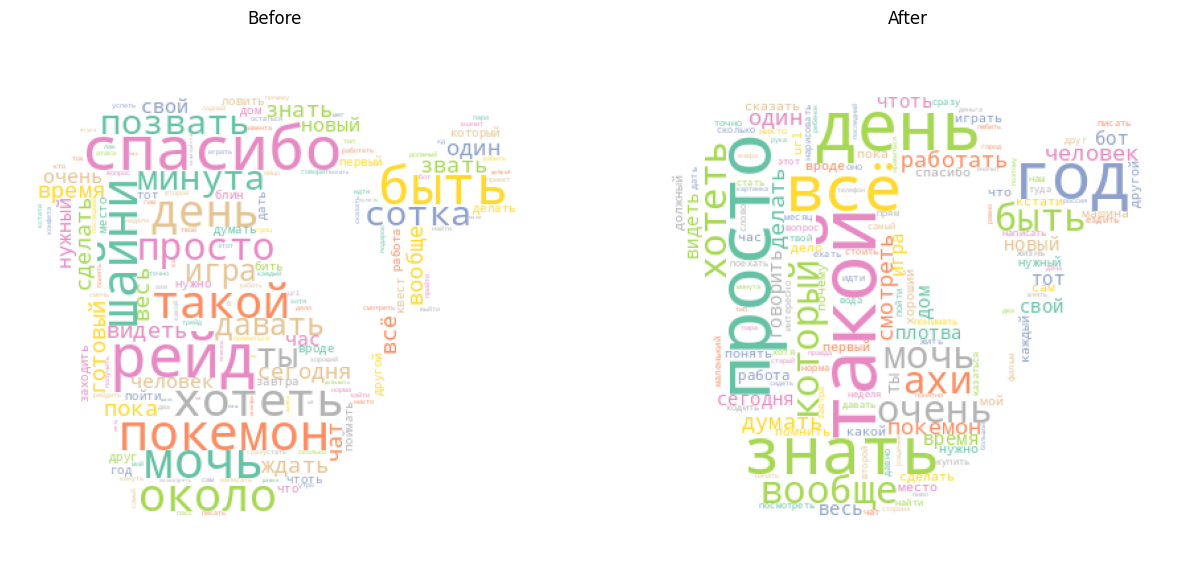

In [ ]:
cloud_before = []
for el in df_text_before['clear_lemmas_mes']:
  cloud_before += el
text = ','.join(cloud_before)
mask = np.array(Image.open('/content/Pikachu.jpg'))
cloud_b = WordCloud(width = 2000,
                    height = 1500,
                    random_state=1, background_color='white',
                    colormap='Set2',
                    collocations=False,
                    mask=mask).generate(text)

cloud_after = []
for el in df_text_after['clear_lemmas_mes']:
  cloud_after += el
text = ','.join(cloud_after)
cloud_a = WordCloud(background_color='white',
                    colormap='Set2',
                    collocations=False,
                    mask=mask).generate(text)

fig, axs = plt.subplots(1, 2, figsize=[15, 10])
axs[0].imshow(cloud_b)
axs[0].set_title('Before')
axs[0].axis('off')
axs[1].imshow(cloud_a)
axs[1].set_title('After')
axs[1].axis('off')

В облаке ДО преимущественно слова об игре, в облаке ПОСЛЕ хоть и встречаются слова об игре, но реже

Посмотрим на количество сообщений ДО и ПОСЛЕ

In [ ]:
mes_count = pd.DataFrame(columns=['Данные', 'Всего всообщений', 'Средняя длина'])
mes_count.loc[len(mes_count.index)] = ['ДО', df_text_before.shape[0], round(len(cloud_before)/df_text_before.shape[0], 1)]
mes_count.loc[len(mes_count.index)] = ['ПОСЛЕ', df_text_after.shape[0], round(len(cloud_after)/df_text_after.shape[0], 1)]
mes_count

,Данные,Всего всообщений,Средняя длина
0,ДО,171855,3.2
1,ПОСЛЕ,32056,4.7


In [ ]:
df_text_before['len_msg'] = df_text_before['clear_lemmas_mes'].apply(lambda x: len(x))
df_text_after['len_msg'] = df_text_after['clear_lemmas_mes'].apply(lambda x: len(x))

In [ ]:
data=(df_text_after.groupby('user_id')['len_msg']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .round(1)
    .to_frame()
    .reset_index(level=0)
)
data['user_id'] = data['user_id'].astype(str)
fig = px.bar(data,
             x='user_id',
             y='len_msg',
             text_auto=True,
             color='user_id',
             template='seaborn+ygridoff+xgridoff')

fig.update_layout(title="ТОП-10 участников по длине сообщения",
                  xaxis_title="Участник",
                  yaxis_title="Средняя длина сообщения")
fig.show()

ДО сообщений больше. Это связано с тем, что было больше подготовок к рейдам, очищать сообщения тщательнее не имеет смысла.  

Сообщения ПОСЛЕ в среднем имеют большую длину, что означает наличие большего количества полных предложений в сообщениях.

# Этап 4: Анализ сообщений. Библиотека Dostoevsky

Загрузим токенизатор и модель и применим ее для сравнения ко всем трём, полученным ранее, типам сообщений: неочищенным, очищенным, лемматизированным.

Анализ сообщений построим по следующему плану:


*   Применим предобученную модель библиотеки Dostievsky для анализа тональности
*   Сформируем выводы



In [ ]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [ ]:
df_text_before['dost_clear_mes'] = model.predict(df_text_before['clear_mes'], k=2)   # очищенные
df_text_before['dost_mes'] = model.predict(df_text_before['message'], k=2)             # неочищенные
df_text_before['dost_clear_lem_mes'] = model.predict(df_text_before['clear_lemmas_mes'].apply(lambda x: ' '.join(x)), k=2)   #  лемматизированные
df_text_after['dost_clear_mes'] = model.predict(df_text_after['clear_mes'], k=2)
df_text_after['dost_mes'] = model.predict(df_text_after['message'], k=2)
df_text_after['dost_clear_lem_mes'] = model.predict(df_text_after['clear_lemmas_mes'].apply(lambda x: ' '.join(x)), k=2)

Библиотека выдает результат в виде словаря вероятностей по нескольким категорям , если анализировать значения в том виде, в котором они есть, мы получим некорректный результат, так как одно сообщение будет подсчитано дважды (в разных категориях).

Чтобы избежать этого, разработаем логику оценки сообщений:
*   speech -речь, без эмоциональной окраски
*   neutral - нейтральна
*   negative - негативная
*   positive - позитивная
*   skip - не определено

Для того, чтобы было не было неопределенных сообщений и немного избавиться от нейтральных (всё же часто смайлики выдают позитив нейтрального текста), определим последовательность обработки результата:
1.   Избавимся от всех skip в пользу остальных статусов
2.   Если разница в вероятности между нейтральным статусом и отличным от нейтального  меньше 20%, возмем не нейтральный статус
3.   Для остальных случаев возмем максимальную вероятность, определенную моделью.

Пользовательская функция status обрабатывает сообщения по принципу:
-   принимает на вход словарь вероятностей
-   если есть skip - возвращает статус отличный от skip
-   если разница в вероятности между нейтральным статусом и отличным от нейтального  меньше 20%, возвращает не нейтральный статус
-   для остальных случаев возвращает ключ с максимальным значением


Пользовательская функция status_val принимает на вход словарь и ключ словаря и возвращает его значение

In [ ]:
def status (dict_):
  a = list(dict_.keys())
  if 'skip' in a:
    a.remove('skip')
    return a[0]
  elif 'neutral' in a:
    n_val = dict_.get('neutral')
    tmp = dict_.copy()
    tmp.pop('neutral')
    for val in tmp.values():
      non_n_val = val
    if (n_val - non_n_val) < 0.2:
      a.remove('neutral')
      return a[0]
    else:
      return max(dict_, key=dict_.get)
  else:
    return max(dict_, key=dict_.get)

def status_val (dict_, key):
  return dict_.get(key)

In [ ]:
# статусы и вероятности для сообщений ДО
df_text_before['dost_clear_mes_status'] = df_text_before['dost_clear_mes'].apply(status)
df_text_before['dost_clear_mes_value'] = df_text_before['dost_clear_mes'].apply(lambda x: status_val(x, status(x)))

df_text_before['dost_mes_status'] = df_text_before['dost_mes'].apply(status)
df_text_before['dost_mes_value'] = df_text_before['dost_mes'].apply(lambda x: status_val(x, status(x)))

df_text_before['dost_clear_lem_mes_status'] = df_text_before['dost_clear_lem_mes'].apply(status)
df_text_before['dost_clear_lem_mes_value'] = df_text_before['dost_clear_lem_mes'].apply(lambda x: status_val(x, status(x)))

In [ ]:
# статусы и вероятности для сообщений после
df_text_after['dost_clear_mes_status'] = df_text_after['dost_clear_mes'].apply(status)
df_text_after['dost_clear_mes_value'] = df_text_after['dost_clear_mes'].apply(lambda x: status_val(x, status(x)))

df_text_after['dost_mes_status'] = df_text_after['dost_mes'].apply(status)
df_text_after['dost_mes_value'] = df_text_after['dost_mes'].apply(lambda x: status_val(x, status(x)))

df_text_after['dost_clear_lem_mes_status'] = df_text_after['dost_clear_lem_mes'].apply(status)
df_text_after['dost_clear_lem_mes_value'] = df_text_after['dost_clear_lem_mes'].apply(lambda x: status_val(x, status(x)))

Посмотрим количество статусов в зависимости от входных данных

In [ ]:
msg_before = pd.DataFrame(df_text_before['dost_clear_lem_mes_status'].value_counts())
msg_before = pd.concat([msg_before,
                 df_text_before['dost_mes_status'].value_counts(),
                 df_text_before['dost_clear_lem_mes_status'].value_counts()],
                axis = 1)
msg_before

,dost_clear_lem_mes_status,dost_mes_status,dost_clear_lem_mes_status
neutral,138037,127658,138037
negative,14473,20780,14473
positive,13086,16745,13086
speech,6259,6672,6259


In [ ]:
msg_after = pd.DataFrame(df_text_after['dost_clear_lem_mes_status'].value_counts())
msg_after = pd.concat([msg_after,
                 df_text_after['dost_mes_status'].value_counts(),
                 df_text_after['dost_clear_lem_mes_status'].value_counts()],
                axis = 1)
msg_after

,dost_clear_lem_mes_status,dost_mes_status,dost_clear_lem_mes_status
neutral,24000,22246,24000
negative,3836,5150,3836
positive,3632,3971,3632
speech,588,689,588


Определение статуса моделью практически не зависит от входных данных(неочищенный текст, очищенный или лемматизированнный), поэтому продолжим анализ на неочищенных сообщениях.
*   Посчитаем метрику качества ( в данном случае будем использовать среднее значение вероятности по каждому типу сообщений)
*   Посмотрим на вероятности того, как библиотека оценила сообщения (построим гистограмму плотности распределения данных)
*   Посчитаем относительное количество сообщений по категориям
*   Построим частотное распределение в форме облака слов по категориям для сообщений ДО и ПОСЛЕ
*   Определим рейтинг негативных пользователей


In [ ]:
positive_before = df_text_before['dost_mes_value'].where(df_text_before['dost_mes_status'] == 'positive').dropna()
negative_before = df_text_before['dost_mes_value'].where(df_text_before['dost_mes_status'] == 'negative').dropna()
neutral_before = df_text_before['dost_mes_value'].where(df_text_before['dost_mes_status'] == 'neutral').dropna()
positive_after = df_text_after['dost_mes_value'].where(df_text_after['dost_mes_status'] == 'positive').dropna()
negative_after = df_text_after['dost_mes_value'].where(df_text_after['dost_mes_status'] == 'negative').dropna()
neutral_after = df_text_after['dost_mes_value'].where(df_text_after['dost_mes_status'] == 'neutral').dropna()

Метрики качества для библиотеки dostoevsky

In [ ]:
mean_points_dost = pd.DataFrame(columns = ['Данные', 'Позитивные', 'Негативные', 'Нейтральные'])
mean_points_dost.loc[len(mean_points_dost.index)] = ['before',
                                           round(positive_before.mean(), 2),
                                           round(negative_before.mean(), 2),
                                           round(neutral_before.mean(), 2)
                                           ]
mean_points_dost.loc[len(mean_points_dost.index)] = ['after',
                                           round(positive_after.mean(), 2),
                                           round(negative_after.mean(), 2),
                                           round(neutral_after.mean(), 2)
                                           ]

mean_points_dost

,Данные,Позитивные,Негативные,Нейтральные
0,before,0.56,0.51,0.84
1,after,0.57,0.47,0.80


Text(0.5, 1.0, 'Нейтральные ПОСЛЕ')

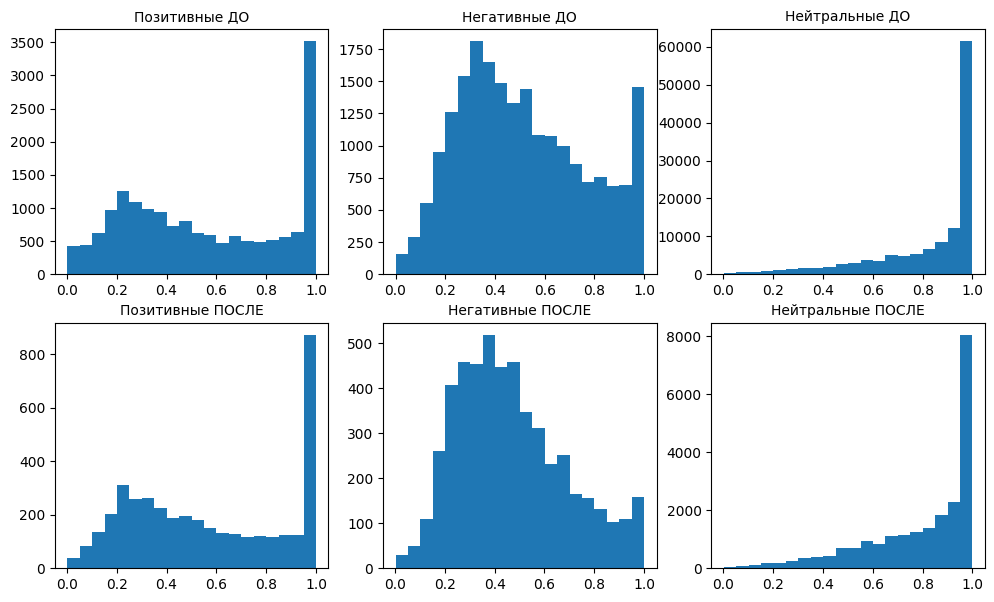

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 3, 1)
plt.hist(positive_before, bins = 20)
plt.title('Позитивные ДО', fontsize=10)

plt.subplot(2, 3, 2)
plt.hist(negative_before, bins = 20)
plt.title('Негативные ДО', fontsize=10)

plt.subplot(2, 3, 3)
plt.hist(neutral_before, bins = 20)
plt.title('Нейтральные ДО', fontsize=10)

plt.subplot(2, 3, 4)
plt.hist(positive_after, bins = 20)
plt.title('Позитивные ПОСЛЕ', fontsize=10)

plt.subplot(2, 3, 5)
plt.hist(negative_after, bins = 20)
plt.title('Негативные ПОСЛЕ', fontsize=10)

plt.subplot(2, 3, 6)
plt.hist(neutral_after, bins = 20)
plt.title('Нейтральные ПОСЛЕ', fontsize=10)

Данный график распределения вероятностей показывает, что некоторая часть позитивных и негативных сообщений определена с низкой вероятностью. Это результат того, что более высокую вероятность (вероятнее всего нейтральную) мы отсекли в момент получения статуса и нас это устраивает.

Посмотрим на относительное количество сообщений по категориям

In [ ]:
percent = pd.DataFrame(columns = ['Категория', 'Кол-во ДО', '% ДО', 'Кол-во ПОСЛЕ', '% ПОСЛЕ', 'Разница'])
percent.loc[len(percent.index)] = ['positive', df_text_before[df_text_before['dost_mes_status'] == 'positive']['dost_mes_status'].count(),
                                   round(df_text_before[df_text_before['dost_mes_status'] == 'positive']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2),
                                   df_text_after[df_text_after['dost_mes_status'] == 'positive']['dost_mes_status'].count(),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'positive']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'positive']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2)
                                   - round(df_text_before[df_text_before['dost_mes_status'] == 'positive']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2)]

percent.loc[len(percent.index)] = ['negative', df_text_before[df_text_before['dost_mes_status'] == 'negative']['dost_mes_status'].count(),
                                   round(df_text_before[df_text_before['dost_mes_status'] == 'negative']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2),
                                   df_text_after[df_text_after['dost_mes_status'] == 'negative']['dost_mes_status'].count(),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'negative']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'negative']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2)
                                   - round(df_text_before[df_text_before['dost_mes_status'] == 'negative']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2)]

percent.loc[len(percent.index)] = ['neutral', df_text_before[df_text_before['dost_mes_status'] == 'neutral']['dost_mes_status'].count(),
                                   round(df_text_before[df_text_before['dost_mes_status'] == 'neutral']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2),
                                   df_text_after[df_text_after['dost_mes_status'] == 'neutral']['dost_mes_status'].count(),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'neutral']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'neutral']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2)
                                   - round(df_text_before[df_text_before['dost_mes_status'] == 'neutral']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2)]

percent.loc[len(percent.index)] = ['speech', df_text_before[df_text_before['dost_mes_status'] == 'speech']['dost_mes_status'].count(),
                                   round(df_text_before[df_text_before['dost_mes_status'] == 'speech']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2),
                                   df_text_after[df_text_after['dost_mes_status'] == 'speech']['dost_mes_status'].count(),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'speech']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2),
                                   round(df_text_after[df_text_after['dost_mes_status'] == 'speech']['dost_mes_status'].count() /
                                         df_text_after['dost_mes_status'].count() * 100 , 2)
                                   - round(df_text_before[df_text_before['dost_mes_status'] == 'speech']['dost_mes_status'].count() /
                                         df_text_before['dost_mes_status'].count() * 100 , 2)]
percent

,Категория,Кол-во ДО,% ДО,Кол-во ПОСЛЕ,% ПОСЛЕ,Разница
0,positive,16745,9.74,3971,12.39,2.65
1,negative,20780,12.09,5150,16.07,3.98
2,neutral,127658,74.28,22246,69.40,-4.88
3,speech,6672,3.88,689,2.15,-1.73


Частотное распределение слов в позитивных сообщениях

(-0.5, 979.5, 979.5, -0.5)

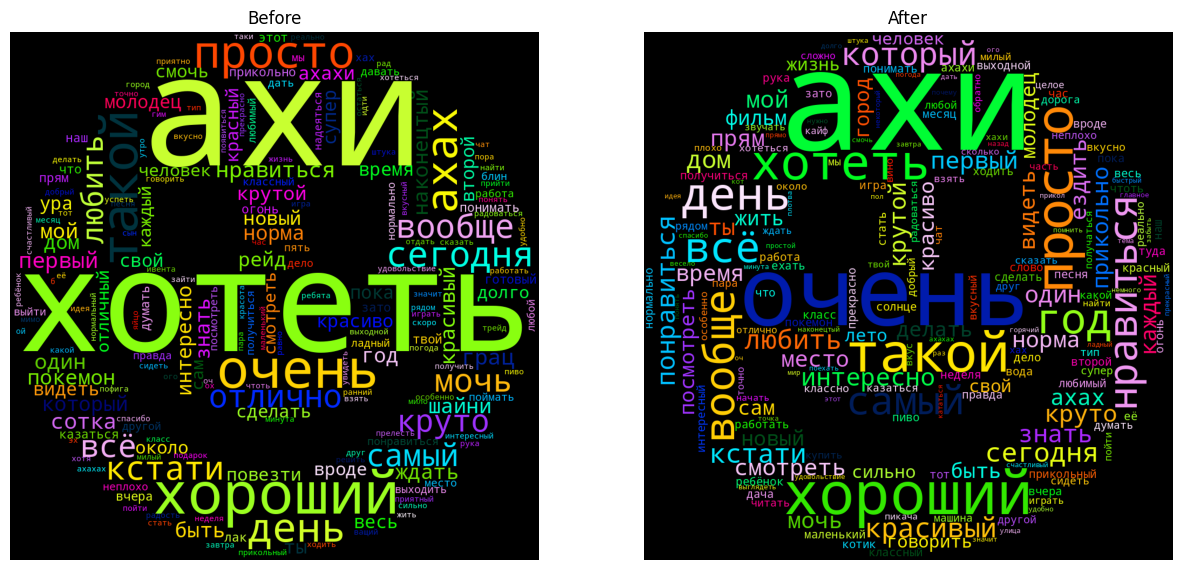

In [ ]:
df_pos_before = df_text_before[df_text_before['dost_mes_status'] == 'positive']
df_pos_after = df_text_after[df_text_after['dost_mes_status'] == 'positive']
cloud_before = []
for el in df_pos_before['clear_lemmas_mes']:
  cloud_before += el
text = ','.join(cloud_before)
mask = np.array(Image.open('/content/positive.jpg'))
cloud_b = WordCloud(width = 2000,
                    height = 1500,
                    random_state=1, background_color='black',
                    colormap='gist_ncar',
                    collocations=False,
                    mask=mask).generate(text)

cloud_after = []
for el in df_pos_after['clear_lemmas_mes']:
  cloud_after += el
text = ','.join(cloud_after)
cloud_a = WordCloud(background_color='black',
                    colormap='gist_ncar',
                    collocations=False,
                    mask=mask).generate(text)

fig, axs = plt.subplots(1, 2, figsize=[15, 10])
axs[0].imshow(cloud_b)
axs[0].set_title('Before')
axs[0].axis('off')
axs[1].imshow(cloud_a)
axs[1].set_title('After')
axs[1].axis('off')

Частотное распределение слов в негативных сообщениях

(-0.5, 259.5, 259.5, -0.5)

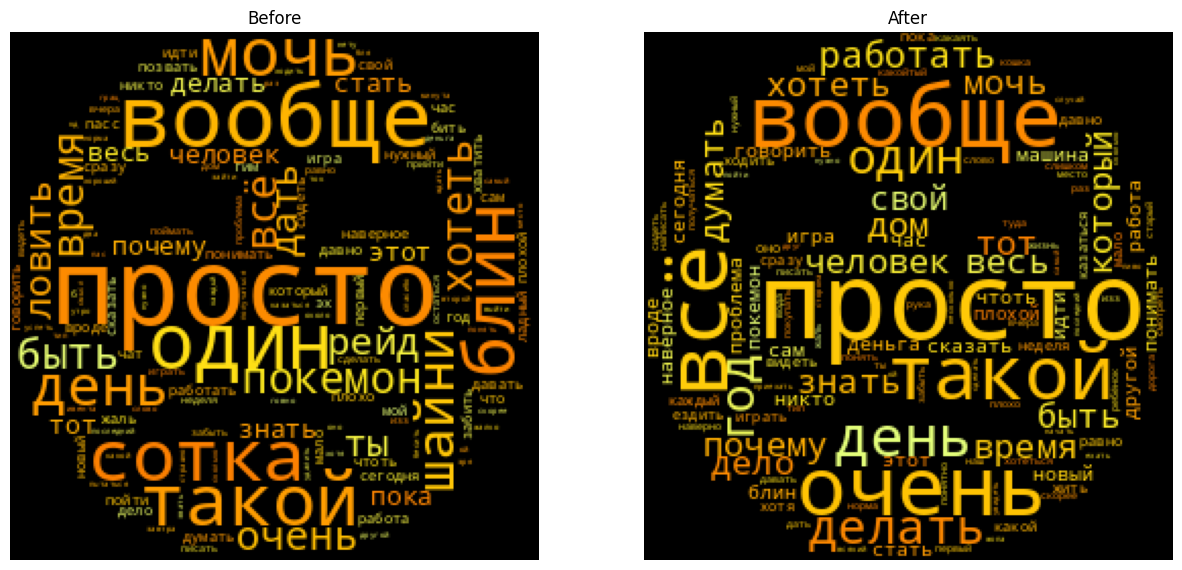

In [ ]:
df_neg_before = df_text_before[df_text_before['dost_mes_status'] == 'negative']
df_neg_after = df_text_after[df_text_after['dost_mes_status'] == 'negative']
cloud_before = []
for el in df_neg_before['clear_lemmas_mes']:
  cloud_before += el
text = ','.join(cloud_before)
mask = np.array(Image.open('/content/angry.jpg'))
cloud_b = WordCloud(width = 2000,
                    height = 1500,
                    random_state=1, background_color='black',
                    colormap='Wistia_r',
                    collocations=False,
                    mask=mask).generate(text)

cloud_after = []
for el in df_neg_after['clear_lemmas_mes']:
  cloud_after += el
text = ','.join(cloud_after)
cloud_a = WordCloud(background_color='black',
                    colormap='Wistia_r',
                    collocations=False,
                    mask=mask).generate(text)

fig, axs = plt.subplots(1, 2, figsize=[15, 10])
axs[0].imshow(cloud_b)
axs[0].set_title('Before')
axs[0].axis('off')
axs[1].imshow(cloud_a)
axs[1].set_title('After')
axs[1].axis('off')

Негативные сообщение в разрезе пользователей ДО и ПОСЛЕ

In [ ]:
before_neg = df_text_before[df_text_before['dost_mes_status'] == 'negative'].groupby('user_id').count().reset_index()
before_neg = before_neg[['user_id','dost_mes_status']].rename(columns={'dost_mes_status' : 'label_before'}).sort_values(by = 'label_before', ascending=False).set_index('user_id')
before_neg_ttl = df_text_before[df_text_before['dost_mes_status'] == 'negative']['dost_mes_status'].count()
after_neg = df_text_after[df_text_after['dost_mes_status'] == 'negative'].groupby('user_id').count().reset_index()
after_neg = after_neg[['user_id','dost_mes_status']].rename(columns={'dost_mes_status' : 'label_after'}).set_index('user_id')
after_neg_ttl = df_text_after[df_text_after['dost_mes_status'] == 'negative']['dost_mes_status'].count()
res_neg = pd.concat([before_neg, after_neg['label_after']], axis=1).fillna(0)
res_neg['rate_before'] = res_neg['label_before'].apply(lambda x: round(x * 100 / before_neg_ttl , 1) )
res_neg['rate_after'] = res_neg['label_after'].apply(lambda x: round(x * 100 / after_neg_ttl , 1) )
res_neg = res_neg.head(10)

In [ ]:
label_neg =  res_neg.index.astype(str)
val_b_neg = res_neg['rate_before'].values
val_a_neg = res_neg['rate_after'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label_neg, y =val_b_neg, name = 'ДО ухода игры', text=val_b_neg))
fig.add_trace(go.Bar(x=label_neg, y =val_a_neg, name = 'ПОСЛЕ ухода игры', text=val_a_neg))
fig.update_layout(
    title="Негативные",
    xaxis_title="id пользователя",
    yaxis_title="% негативных сообщений от общего кол-ва негатиных сообщений",
    template='seaborn+ygridoff+xgridoff')

fig.show()

Помесячный процент негативных сообщений от общего количества сообщений

In [ ]:
df_neg_after = df_neg_after[df_neg_after['date'] < '2023-12-01']
df_neg_after['month'] = pd.to_datetime(df_neg_after['date']).dt.strftime('%b-%Y')
tmp_d = df_neg_after.groupby('month')['id'].count().reset_index()
tmp_d['sort'] = pd.to_datetime(tmp_d['month'])
tmp_d = tmp_d.sort_values('sort')
ttl_mes = df_text_after.copy()
ttl_mes['month'] = pd.to_datetime(ttl_mes['date']).dt.strftime('%b-%Y')
ttl_mes = ttl_mes.groupby('month')['date'].count().reset_index().rename(columns={'date':'ttl_count', 'sort':'s'})
ttl_mes['sort'] = pd.to_datetime(ttl_mes['month'])
ttl_mes = ttl_mes.sort_values('sort')
tmp_d = pd.merge(tmp_d,ttl_mes, on = 'sort')
tmp_d['rate'] = round(tmp_d['id'] * 100 / tmp_d['ttl_count'] , 1)

<ipython-input-359-4b41409fedbd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(tmp_d, x='sort', y='rate', trendline='ols', trendline_scope='overall')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2)
                              ))
fig.update_layout(
    title="Процент негативных сообщений от общего кол-ва сообщений в периоде",
    xaxis_title="Период",
    yaxis_title="% негативных сообщений от общего кол-ва",
    template='seaborn+ygridoff+xgridoff'
    )
fig.show()

Результаты анализа тональности сообщений телеграм-чата при помощи библиотеки Dostoevskiy можно сделать следующие:

1.  После ухода игры за аналогичный промежуток времени сообщений впринципе стало меньше, это объясняется отсутствием общей ежедневной активности.
2.   На фоне снижения относительного числа нейтральных (на 4,88%) и речевых (на 1,73%) сообщений наблюдается относительное увеличесние позитивных (на 2,65%) и негативных (3,98%) сообщений. Это, в первую очередь, говорит о том, что общение стало более живым и эмоционально-окрашенным.
3. Увеличение негативных же сообщений (на 3,98%) было проанализировано на сезонность и в разрезе пользователей. Зависимости негатива от времени не обнаружено, однако несколько пользователей показали возросший негатив, в сравнении с сообщениями ДО. В данном случае мы не будем анализировать сообщения пользователей с возросшим негативом, скажем только то, что возросший показатель негатива не означает негативное отношение/поведение участника в чате (это могут быть обсуждение новостей, к примеру, или высказывание личного мнения о чем-либо)

# Этап 5: Анализ сообщений. Библиотека transformers

Анализ сообщений построим по аналогичному плану:


*   Подберем предобученную модель библиотеки transformers для анализа тональности и применим ее
*   Посчитаем метрику качества (будем использовать среднее значение вероятности по каждому типу сообщений)
*   Посмотрим на вероятности того, как библиотека оценила сообщения (построим гистограмму плотности распределения данных)
*   Посчитаем относительное количество сообщений по категориям
*   Определим рейтинг негативных пользователей и проверим негативные сообщения в разрезе времени
*   Сформируем выводы и сравним результаты с библиотекой Dostoevskiy

Для чистоты анализируемых данных возмем те же сообщения, что и при анализе библиотекой Dostoevskiy:

In [ ]:
df_text_before_transf = df_text_before.copy()
df_text_after_transf = df_text_after.copy()

In [ ]:
model_name = 'seara/rubert-tiny2-russian-sentiment'    # предобученная модель
model_rubert = pipeline('sentiment-analysis',
                 model=model_name,
                 tokenizer=model_name,
                 max_length=3000,
                 truncation=True)

Данная модель разбивает текст на токены и работает с ними, логично, что есть максимальная длина. В сообщениях были обнаружены информационные сообщения, касающиеся игры, которые модель не смогла разбить на токены и разбивала побуквенно. Поэтому от таких сообщений была произведена очистка.
*   В сообщениях ДО: удалены после предварительной проверки очень длинные сообщения (>1500), сообщения с тегами  #инфа , #даты, а так же сообщения с некоторым шаблоном.
*   В сообщениях после: только одно сообщение

In [ ]:
to_drop = list(df_text_before.loc[df_text_before['message'].str.len() > 1500].index.values)
to_drop.extend(list(df_text_before[df_text_before['message'].str.contains('#инфа') |
                                          df_text_before['message'].str.contains('#даты')]
                    .index.values))
to_drop.extend(list(df_text_before[df_text_before['message']
                                          .str.contains(r'\S+(cp\d\d\d-\d\d\d),(cp\d\d\d-\d\d\d),(cp\d\d\d-\d\d\d)\S+')]
                    .index.values))
to_drop.extend(list(df_text_before[df_text_before['message']
                                          .str.contains(r'\S+(бс\d\d\d-\d\d\d),(бс\d\d\d-\d\d\d),(бс\d\d\d-\d\d\d)\S+')]
                    .index.values))
to_drop.extend([104117])
to_drop = list(set(to_drop))
to_drop.sort()
df_before_to_drop =df_text_before.loc[to_drop]
# df_before_to_drop.groupby('dost_mes_status')['id'].count()   # тип сообщений по мнению Dostoevsky

<ipython-input-363-b831239d8ce6>:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

<ipython-input-363-b831239d8ce6>:10: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



По мнению библиотеки Dostoevsky к удалению подлежат сообщения:

*   negative      3
*   neutral     242
*   positive      1
*   speech       11

однако, эти сообщения были оценены визуально как информационные.

In [ ]:
df_text_before.drop(index=to_drop, inplace=True)

Функция sentiment_ruber принимает на вход результат рабты модели rubert и т.к. пайплайн возвращает список, функция будет возвращать 0й словарь из списка

In [ ]:
def sentiment_ruber(str):
   return model_rubert(str)[0]

Применим модель к сообщениям ДО

In [ ]:
df_text_before = df_text_before.assign(
    sentiment = lambda x: x['message'].swifter.apply(lambda y: sentiment_ruber(y))
    )

Pandas Apply:   0%|          | 0/171598 [00:00<?, ?it/s]

Применим модель к сообщениям ПОСЛЕ

In [ ]:
df_text_after = (
    df_text_after
    .drop(index=[28834])     # нейтральное сообщение с проблемой превышения длины tensor
    .assign(sentiment = lambda x: x['message'].swifter.apply(lambda y: sentiment_ruber(y)))
)

Pandas Apply:   0%|          | 0/32055 [00:00<?, ?it/s]

Библиотека transformers, в отличае от Dostoevskiy, в результат записывает тип сообщения с максимальной вероятностью, поэтому здесь нет необходимости выбирать. В результате в столбце 'sentiment' у нас записан словарь, где лючем является лейбл, а значением - вероятность, поэтому достанем label и value в столбцы

In [ ]:
df_text_before['sentiment'] = df_text_before['sentiment'].apply(lambda x: literal_eval(str(x)))
df_text_before['transf_status'] = df_text_before['sentiment'].apply(lambda x: x.get('label'))
df_text_before['transf_value'] = df_text_before['sentiment'].apply(lambda x: x.get('score'))
df_text_after['sentiment'] = df_text_after['sentiment'].apply(lambda x: literal_eval(str(x)))
df_text_after['transf_status'] = df_text_after['sentiment'].apply(lambda x: x.get('label'))
df_text_after['transf_value'] = df_text_after['sentiment'].apply(lambda x: x.get('score'))

In [ ]:
positive_before = df_text_before['transf_value'].where(df_text_before['transf_status'] == 'positive').dropna()
negative_before = df_text_before['transf_value'].where(df_text_before['transf_status'] == 'negative').dropna()
neutral_before = df_text_before['transf_value'].where(df_text_before['transf_status'] == 'neutral').dropna()
positive_after = df_text_after['transf_value'].where(df_text_after['transf_status'] == 'positive').dropna()
negative_after = df_text_after['transf_value'].where(df_text_after['transf_status'] == 'negative').dropna()
neutral_after = df_text_after['transf_value'].where(df_text_after['transf_status'] == 'neutral').dropna()

Метрики качества для библиотеки transformers

In [ ]:
mean_points_transf = pd.DataFrame(columns = ['Данные', 'Позитивные', 'Негативные', 'Нейтральные'])
mean_points_transf.loc[len(mean_points_transf.index)] = ['before',
                                           round(positive_before.mean(), 2),
                                           round(negative_before.mean(), 2),
                                           round(neutral_before.mean(), 2)
                                           ]
mean_points_transf.loc[len(mean_points_transf.index)] = ['after',
                                           round(positive_after.mean(), 2),
                                           round(negative_after.mean(), 2),
                                           round(neutral_after.mean(), 2)
                                           ]

mean_points_transf

,Данные,Позитивные,Негативные,Нейтральные
0,before,0.80,0.64,0.77
1,after,0.78,0.64,0.77


Гистограмма плотности распределения данных

Text(0.5, 1.0, 'Нейтральные ПОСЛЕ')

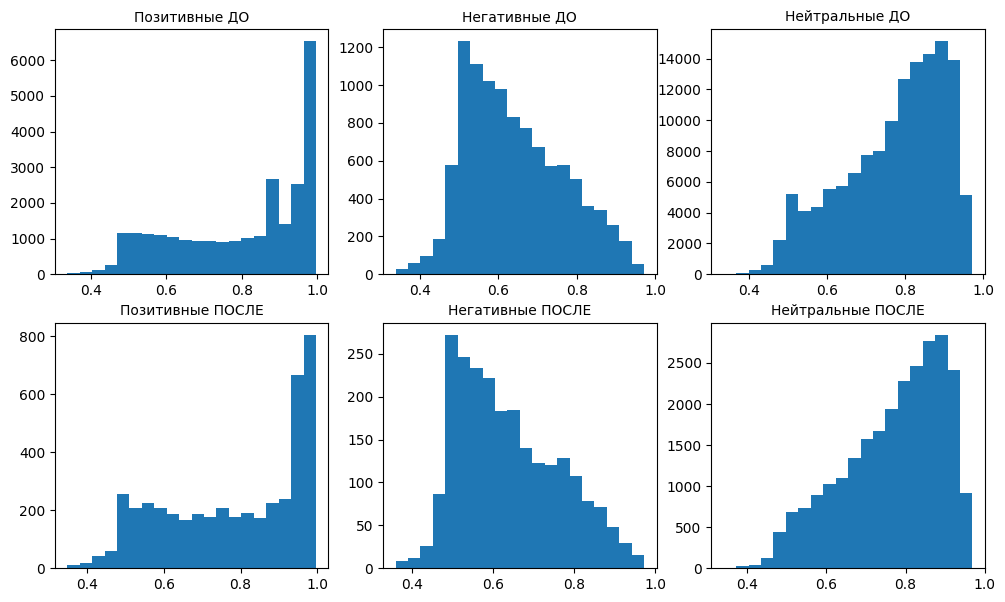

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 3, 1)
plt.hist(positive_before, bins = 20)
plt.title('Позитивные ДО', fontsize=10)

plt.subplot(2, 3, 2)
plt.hist(negative_before, bins = 20)
plt.title('Негативные ДО', fontsize=10)

plt.subplot(2, 3, 3)
plt.hist(neutral_before, bins = 20)
plt.title('Нейтральные ДО', fontsize=10)

plt.subplot(2, 3, 4)
plt.hist(positive_after, bins = 20)
plt.title('Позитивные ПОСЛЕ', fontsize=10)

plt.subplot(2, 3, 5)
plt.hist(negative_after, bins = 20)
plt.title('Негативные ПОСЛЕ', fontsize=10)

plt.subplot(2, 3, 6)
plt.hist(neutral_after, bins = 20)
plt.title('Нейтральные ПОСЛЕ', fontsize=10)

График распределения вероятностей говорит нам о том, что библиотека transformers определяет позитивные и негативные сообщения с большей вероятностью, нежеди библиотека dostoevskiy (вероятностей ниже 40% очень мало)

In [ ]:
before = df_text_before.copy()
after = df_text_after.copy()

Относительное количество сообщений по категориям

In [ ]:
all = after['transf_status'].count()
percent = pd.DataFrame(columns = ['Категория', 'Кол-во ДО', '% ДО', 'Кол-во ПОСЛЕ', '% ПОСЛЕ', 'Разница'])
percent.loc[len(percent.index)] = ['positive', before[before['transf_status'] == 'positive']['transf_value'].count(),
                                   round(before[before['transf_status'] == 'positive']['transf_value'].count() /
                                         before['transf_status'].count() * 100 , 2),
                                   after[after['transf_status'] == 'positive']['transf_value'].count(),
                                   round(after[after['transf_status'] == 'positive']['transf_value'].count() /
                                         all * 100 , 2),
                                   round(after[after['transf_status'] == 'positive']['transf_value'].count() /
                                         all * 100 , 2)
                                   - round(before[before['transf_status'] == 'positive']['transf_value'].count() /
                                         before['transf_status'].count() * 100 , 2)]

percent.loc[len(percent.index)] = ['negative', before[before['transf_status'] == 'negative']['transf_value'].count(),
                                   round(before[before['transf_status'] == 'negative']['transf_value'].count() /
                                         before['transf_status'].count() * 100 , 2),
                                   after[after['transf_status'] == 'negative']['transf_value'].count(),
                                   round(after[after['transf_status'] == 'negative']['transf_value'].count() /
                                         all * 100 , 2),
                                   round(after[after['transf_status'] == 'negative']['transf_value'].count() /
                                         all * 100 , 2)
                                   - round(before[before['transf_status'] == 'negative']['transf_value'].count() /
                                         before['transf_status'].count() * 100 , 2)]

percent.loc[len(percent.index)] = ['neutral', before[before['transf_status'] == 'neutral']['transf_value'].count(),
                                   round(before[before['transf_status'] == 'neutral']['transf_value'].count() /
                                         before['transf_status'].count() * 100 , 2),
                                   after[after['transf_status'] == 'neutral']['transf_value'].count(),
                                   round(after[after['transf_status'] == 'neutral']['transf_value'].count() /
                                         all * 100 , 2),
                                   round(after[after['transf_status'] == 'neutral']['transf_value'].count() /
                                         all * 100 , 2)
                                   - round(before[before['transf_status'] == 'neutral']['transf_value'].count() /
                                         before['transf_status'].count() * 100 , 2)]
percent

,Категория,Кол-во ДО,% ДО,Кол-во ПОСЛЕ,% ПОСЛЕ,Разница
0,positive,25952,15.12,4425,13.80,-1.32
1,negative,10414,6.07,2338,7.29,1.22
2,neutral,135232,78.81,25292,78.90,0.09


Так же определим рейтинг участников для негативных сообщений и посмотрим на негативные сообщения в разрезе времени

Определим топ-10 пользователей

In [ ]:
before_neg = before[before['transf_status'] == 'negative'].groupby('user_id').count().reset_index()
before_neg = before_neg[['user_id','transf_status']].rename(columns={'transf_status' : 'label_before'}).sort_values(by = 'label_before', ascending=False).set_index('user_id')
before_neg_ttl = before[before['transf_status'] == 'negative']['transf_status'].count()
after_neg = after[after['transf_status'] == 'negative'].groupby('user_id').count().reset_index()
after_neg = after_neg[['user_id','transf_status']].rename(columns={'transf_status' : 'label_after'}).set_index('user_id')
after_neg_ttl = after[after['transf_status'] == 'negative']['transf_status'].count()
res_neg = pd.concat([before_neg, after_neg['label_after']], axis=1).fillna(0)
res_neg['rate_before'] = res_neg['label_before'].apply(lambda x: round(x * 100 / before_neg_ttl , 1) )
res_neg['rate_after'] = res_neg['label_after'].apply(lambda x: round(x * 100 / after_neg_ttl , 1) )
res_neg = res_neg.head(10)

In [ ]:
label_neg =  res_neg.index.astype(str)
val_b_neg = res_neg['rate_before'].values
val_a_neg = res_neg['rate_after'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label_neg, y =val_b_neg, name = 'ДО ухода игры', text=val_b_neg))
fig.add_trace(go.Bar(x=label_neg, y =val_a_neg, name = 'ПОСЛЕ ухода игры', text=val_a_neg))
fig.update_layout(
    title="Негативные",
    xaxis_title="id пользователя",
    yaxis_title="% негативных сообщений от общего кол-ва негатиных сообщений",
    template='seaborn+ygridoff+xgridoff')

fig.show()

Помесячный процент негативных сообщений от общего количества сообщений

In [ ]:
df_neg_after = df_text_after[(df_text_after['transf_status'] == 'negative') & (df_text_after['date'] < '2023-12-01')]
df_neg_after['month'] = pd.to_datetime(df_neg_after['date']).dt.strftime('%b-%Y')
tmp_t = df_neg_after.groupby('month')['id'].count().reset_index()
tmp_t['sort'] = pd.to_datetime(tmp_t['month'])
tmp_t = tmp_t.sort_values('sort')
ttl_mes = df_text_after.copy()
ttl_mes['month'] = pd.to_datetime(ttl_mes['date']).dt.strftime('%b-%Y')
ttl_mes = ttl_mes.groupby('month')['date'].count().reset_index().rename(columns={'date':'ttl_count', 'sort':'s'})
ttl_mes['sort'] = pd.to_datetime(ttl_mes['month'])
ttl_mes = ttl_mes.sort_values('sort')
tmp_t = pd.merge(tmp_t,ttl_mes, on = 'sort')
tmp_t['rate'] = round(tmp_t['id'] * 100 / tmp_t['ttl_count'] , 1)

<ipython-input-377-8e900484b747>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(tmp_t, x='sort', y='rate', trendline='ols', trendline_scope='overall')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2)
                              ))
fig.update_layout(
    title="Процент негативных сообщений от общего кол-ва сообщений в периоде",
    xaxis_title="Период",
    yaxis_title="% негативных сообщений от общего кол-ва",
    template='seaborn+ygridoff+xgridoff'
    )
fig.show()

# Этап 6: Метрики качества

Метриками качества во время анализа библиотеками мы считали среднюю вероятность, рассчитанную библиотекой в зависимости от типа сообщения


In [ ]:
mean_points_dost

,Данные,Позитивные,Негативные,Нейтральные
0,before,0.56,0.51,0.84
1,after,0.57,0.47,0.80


In [ ]:
dost_avg_b = round(df_text_before['dost_mes_value'].mean(), 2)
dost_avg_a = round(df_text_after['dost_mes_value'].mean(), 2)
print( f'Средняя вероятность, определенная библиотекой Dostoevskiy, для сообщений ДО: {dost_avg_b}')
print( f'Средняя вероятность, определенная библиотекой Dostoevskiy, для сообщений ПОСЛЕ: {dost_avg_a}')

Средняя вероятность, определенная библиотекой Dostoevskiy, для сообщений ДО: 0.77
Средняя вероятность, определенная библиотекой Dostoevskiy, для сообщений ПОСЛЕ: 0.72


In [ ]:
mean_points_transf

,Данные,Позитивные,Негативные,Нейтральные
0,before,0.80,0.64,0.77
1,after,0.78,0.64,0.77


In [ ]:
tr_avg_b = round(df_text_before['transf_value'].mean(), 2)
tr_avg_a = round(df_text_after['transf_value'].mean(), 2)
print( f'Средняя вероятность, определенная библиотекой Transformers, для сообщений ДО: {tr_avg_b}')
print( f'Средняя вероятность, определенная библиотекой Transformers, для сообщений ПОСЛЕ: {tr_avg_a}')

Средняя вероятность, определенная библиотекой Transformers, для сообщений ДО: 0.77
Средняя вероятность, определенная библиотекой Transformers, для сообщений ПОСЛЕ: 0.76


Так как в данной работе у нас нет эталонного результата работы какой-либо модели, то в качестве финальной метрики качества сравним "лейблы" от двух библиотек и рассчитаем процент совпадений.

Функция quality принимает на вход две серии одинаковой длины, содержащие тип сообщения, попарно сравнивает их и подсчитывает процент совпадений

In [ ]:
def quality(s1, s2):
  df = pd.concat([s1, s2], axis=1 )
  df['sort'] = np.where(df.iloc[:,0] == df.iloc[:,1], 1, 0)
  a = df.groupby('sort').count().reset_index()
  ttl = len(df['sort'])
  true_ = df['sort'].sum()
  return  f'Процент совпадения: {round(true_ * 100 / ttl, 2)}%'

In [ ]:
quality_metric = pd.DataFrame(columns = ['Набор данных', '% Совпадения'])
quality_metric.loc[len(quality_metric.index)] = ['ДО', quality(df_text_before['dost_mes_status'], df_text_before['transf_status'])]
quality_metric.loc[len(quality_metric.index)] = ['ПОСЛЕ', quality(df_text_after['dost_mes_status'], df_text_after['transf_status'])]
quality_metric

,Набор данных,% Совпадения
0,ДО,Процент совпадения: 74.78%
1,ПОСЛЕ,Процент совпадения: 72.72%


Выводы:

1. Средние вероятности определения библиотекой Dostoevsky типов сообщений, в общем, кажутся ниже, чем библиотекой Transformers, однако усредненные значения сравнимы. Для сообщений ДО 0,77/0,77 и для сообщений ПОСЛЕ 0,72/0,76.

2. Финальный процент совпадения по обеим библиотекам составил 74,78%/72,72% для сообщений ДО/ПОСЛЕ. Это хороший показатель, говорит нам о том, что примерно на 73% наш анализ верный.

# Этап 7: Анализ сообщений ботов

*Справка: немного о механике игры. На гиме в произвольный момент времени появляется "яйцо какого-то уровня" с обратным таймером на 40 минут. Через 40 минут яйцо лопается и на следующие 40 минут становится доступен босс (произвольный, но соответствующий уровню яйца и доступный на данный момент в игре). У игровков есть 40+40 минут для того, чтобы сорганизоваться для рейда, дойти до гима и победить босса за плюшки и возможность поймать такого же босса для своей коллекции. В какой-то момент времени механика была обновлена и в игру ввели дистанционные пропуски. Имея такой пропуск, можно присоединиться к рейду по призыву другого игрока или, если гим в зоне видимости, то самому удаленно присоединиться.*

*Чем выше уровень босса, тем больше игроков необходимо для того, чтобы его победить. Для этого в чат были добавлены специальные боты, через которых удобно создавать опросники для конкретного рейда*

Для того, чтобы оценить игровую историю, проанализируем сообщения от ботов.

Строка для загрузки файла с диска

df_mes_from_bot = pd.read_csv('/content/gdrive/MyDrive/Аналитик_итоговый_проект/df_mes_from_bot.csv')

In [ ]:
df_mes_from_bot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25167 entries, 4624 to 12600
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   _           12601 non-null  object             
 1   user_id     12601 non-null  float64            
 2   id          12601 non-null  float64            
 3   date        12601 non-null  datetime64[ns, UTC]
 4   message     12601 non-null  object             
 5   via_bot_id  8096 non-null   float64            
 6   entities    12601 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(3)
memory usage: 1.5+ MB


Имеем следующий набор данных:
*   _ - тип сообщения
*   user_id - id бота в чате
*   id - номер сообщения
*   date - дата
*   message - текст сообщения
*   via_bot_id - id бота, через которого отправлено сообщение
*   entities - сущности или атрибуты сообщения

Сразу вспомним, что игра перестала работать 2022-03-11 и возмем только сообщения до этой даты

In [ ]:
df_mes_bot = df_mes_from_bot[df_mes_from_bot['date'] <= '2022-03-11']

В чате присутствовали боты 2х типов: развлекательные (для общения) и боты, помогающие собираться на рейды.

Обработаем сообщения от вторых ботов, чтобы понять больше о самих рейдах.
Отличить эти сообщения от остальных можно по первым символам: '🗣' и 'Гим: '. Возмем только колонки: 'user_id', 'date', 'message', 'entities'

In [ ]:
df_raid = pd.concat(
    [df_mes_bot[df_mes_bot['message'].str.startswith('🗣') == True],
    df_mes_bot[df_mes_bot['message'].str.startswith('Гим: ') == True]
    ]
)[['user_id', 'date', 'message', 'entities']]

Обработаем данные по плану:

*   Из message извлечем название Gym'а, лидера рейда и boss'а
*   Обработаем полученные данные, унифицируем
*   Обработаем entities, извлечем геоданные


(для загрузки с диска:
-  df_raid['date'] =  df_raid['date'].apply(pd.to_datetime)
-  df_raid.isetitem(0, df_raid['user_id'].astype(int))



In [ ]:
df_raid['date_date'] = df_raid['date'].apply(lambda x: x.date)

Напишем функцию gym, которая принимает на вход строку сообщения от босса. В зависимости от типа сообщения возвращает:
  - "удаленный", для удаленных рейдов, в которых нет названия Gym'а
  - Название Gym'а, найденное по шаблону строки, для пешеходных рейдов

In [ ]:
def gym(a):
  try:
    b = str(a)
    if b.startswith('🗣'):
      return 'Удалённый'
    elif b.startswith('Гим'):
      pattern = '(Гим: )(.*)(\n)'
      gym = re.search(pattern, b)
      return gym[0][5:-1].lower()
    else:
      return None
  except TypeError:
    print(a)

In [ ]:
df_raid['gym'] = df_raid['message'].apply(gym)

Так как при создании сообщения с организацией рейда есть возможность выбирать название из списка и в дальнейшем его изменять, организаторы часто пользовались этим, вследствии чего некоторые названия написаны по разному. Приведем основные названия к единому виду

In [ ]:
df_raid['gym'] = df_raid['gym'].apply(lambda x: x.replace('(час рейдов)', ''))
df_raid['gym'] = df_raid['gym'].apply(lambda x: x.replace('ex-gym ', ''))
df_raid['gym'] = np.where((df_raid['gym'].str.contains('лев')), 'кованый лев', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('фонтан')), 'фонтан', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('стомат')), 'стоматологическая на косыгина', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('якор')), 'якорь', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('свинка')), 'свинка', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('винни')), 'винни пух', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('gift ')), 'gift box', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('гифт')), 'gift box', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('арт')), 'арт хаус', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('ежи')), 'antitank hedgehog', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('бегемот')), 'бегемот с виолончелью', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('zebra')), 'зебра', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('июнь')), 'июнь тц', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('соц')), 'центр соцпомощи', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('проклятый')), 'проклятый двор', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('пилон')), 'пилоны на коммуне', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('pylons')), 'пилоны на коммуне', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('ladozhskiy')), 'ладожский вокзал', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('фабер')), 'площадь фаберже', df_raid['gym'])
df_raid['gym'] = np.where((df_raid['gym'].str.contains('ноты')), 'ноты на стене', df_raid['gym'])

Напишем функцию leader, которая находит в строке с сообщениями 2х типов инициатора рейда и возвращает его.

In [ ]:
def leader(b):
  a = str(b)
  if a.startswith('🗣'):
    create = a.split('\n')[0]
    emo = emoji.emoji_list(create)
    end_smile = emo[1].get('emoji')
    pattern = r'(@)(.*)' + end_smile
    create = re.search(pattern, create)
    return create[0][1:-2]

  elif a.startswith('Гим'):
    for i, el in enumerate(a.split('\n')):
      if str(el).startswith('Создано'):
        create = el
        return create.lstrip('Создано: @')

В 97 сообщениях отсутствует создатель, сделать мы ничего не сможем,оставим пропуски

In [ ]:
df_raid['leader'] = df_raid['message'].apply(leader)
df_raid[df_raid['leader'].isna()].count()

user_id      97
date         97
message      97
entities     97
date_date    97
gym          97
leader        0
dtype: int64

Исправим пару ников, участники их меняли

In [ ]:
df_raid['leader'] = df_raid['leader'].apply(lambda x: x.replace('Лёшк@', 'XEPOBEHA') if x else x)
df_raid['leader'] = df_raid['leader'].apply(lambda x: x.replace('La\_Nych', 'La_Nych') if x else x)
df_raid['leader'] = df_raid['leader'].apply(lambda x: x.replace('NSG700', 'NSG_700') if x else x)

Напишем функцию boss, которая принимает на вход строку и в зависимости от типа сообщения возвращает рейд-босса:
  - текст из третьей строки без смайликов для типа '🗣', строка с боссом фиксирована
  - ищет строку с боссом по шаблону, возвращает тест без смайликов и 'Рейд Босс: ' для типа 'Гим'

In [ ]:
def boss(b):
  try:
    a = str(b)
    if a.startswith('🗣'):
      boss = a.split('\n')[2]
      pattern = r'(.*)(\|)'
      boss = re.search(pattern, boss)
      res = boss[0]
      res = re.split(r'(\|)(.*)', res)[0]
      emo = emoji.emoji_list(res)
      emoj = []
      for el in emo:
        emoj.append(el.get('emoji'))
      if len(emoj)>0:
        for el in emoj:
          res = res.replace(el, '')
        return res
      else:
        return res

    elif a.startswith('Гим'):
      boss = a.split('\n')[2]
      pattern = r'[ABCDIFGHIJKLONMPQRSTUVWXYZРЯ]'
      if boss[0] not in pattern:
        boss = a.split('\n')[3]
        if boss[0] not in pattern:
          boss = a.split('\n')[4]
      emo = emoji.emoji_list(boss)
      emoj = []
      for el in emo:
        emoj.append(el.get('emoji'))
      if len(emoj)>0:
        for el in emoj:
          end = emo[0].get('match_start')
          boss = boss.replace(el, '')
        if boss.startswith('Рейд'):
          res = boss.rstrip(' ').lstrip('Рейд Босс: ')
          return res
        else:
          res = boss[:end].rstrip(' ')
          return res
      else:
        if boss.startswith('Рейд'):
          res = boss.rstrip(' ').lstrip('Рейд Босс: ')
          return res
        else:
          res = boss.strip(' ')
          return res
  except IndexError:
    print(b)

Одной записью пренебрежем

In [ ]:
df_raid['boss'] = df_raid['message'].apply(boss)

Гим: ⚠️Кованый Лев⚠️
             ❗️Призывной❗️

Кто еще не бил,сходите перед Новым годом
улица Коммуны 42, Санкт-Петербург
Рейд Босс: Яйцо уровня 3
Рейд закончен

❤ Valor:  1 
✓ 37 @SnakeRussiaGo

Создано: @Aleksstar1
Обновлено: 19:56:05  R-ID = 15406


Некоторые названия покемонов дублируются в разных вариациях, так как созданы разными ботами или исправлены админами.
Изменим неверные названия для покемонов

In [ ]:
df_raid['boss'] = np.where((df_raid['boss'].str.contains('eoxys')), 'Deoxys', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('andorus')), 'Landorus', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('MAmpha')), 'MAmpharos', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('MAboma')), 'MAbomasnow', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('undurus')), 'Thundurus', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('opunny')), 'Mega Lopunny', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('blast')), 'Mega Blastoise', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('MCharY')), 'Mega Charizard Y', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('MCharX')), 'Mega Charizard X', df_raid['boss'])
df_raid['boss'] = np.where((df_raid['boss'].str.contains('Venu')), 'Mega Venusaur', df_raid['boss'])
df_raid.groupby('boss').count()['gym'].sort_values(ascending=False)

boss
Яйцо уровня 5    840
Giratina         520
Rayquaza         373
Darkrai          346
Heatran          339
                ... 
Pancham            1
Pikachu            1
Piloswine          1
Poliwrath          1
Magikarp           1
Name: gym, Length: 124, dtype: int64

Каждый покемон имеет свой тип. Напишем функцию pok_type, которая возвращает тип покемона из словаря

In [ ]:
def pok_type(str_):
  type_dict = {
      'grass':['Ferroseed','Shiftry','Bellossom','Virizion','Mega Venusaur',],
      'dark':['Houndoom','Absol','Darkrai','Yveltal','MAbsol','MHound',],
      'water':['Alomomola','Magikarp','Poliwrath','Lapras','Gyarados','Palkia','Suicune','Kyogre','MSlowpoke','Mega Blastoise', 'MGyara',],
      'fire':['Darumaka','Charizard','Magmar','Marowak-A','Blaziken','Moltres','Ho-Oh','Heatran','Entei','Mega Charizard Y','Mega Charizard X',],
      'fairy':['Zacian','Xerneas','Zacian - Hero',],
      'fighting':['Gible','Timburr','Pancham','Machamp','Zamazenta',],
      'electric':['Pikachu','Magnemite','Raichu-A','Tapu Koko','Zapdos','Thundurus','Raikou','MAmpharos','MManec',],
      'dragon':['Deino','Druddigon','Dragonite','Kyurem','Zekrom','Reshiram','Rayquaza','Latios','Latias','MAltar',],
      'psychic':['Unown-U','Espurr','Unown','Elgyem','Lugia','Cresselia','Mewtwo','Mesprit','Mewtwo-A','Deoxys',],
      'flying':['Tornadus Therian','Tornadus','Tornadus-T','MPidge',],
      'normal':['Rufflet','Bidoof','Chansey','Kangaskhan','Snorlax','Regigigas','Mega Lopunny',],
      'ground':['Golurk', 'Rhydon','Marowak','Excadrill','Landorus','Groudon',],
      'ghost':['Duskull','Gengar','Giratina','Giratina-A','MGengar',],
      'ice':['Piloswine','Articuno','Regice','MAbomasnow',],
      'bug':['Scyther','Heracross','Genesect',],
      'rock':['Aerodactyl','Tyranitar','Terrakion','Regirock','MAerodactyl'],
      'steel':['Aggron','Metagross','Cobalion','Dialga','Registeel','MSteelix'],
      'poison':['Weezing','Weezing-G',]
  }
  for key, val in type_dict.items():
    if str_ in val:
      return key

In [ ]:
df_raid['type'] = df_raid['boss'].apply(pok_type)


Каждый покемон-босс имеет свой уровень сложности, эта информация присутствует в части сообщений от ботов, но в малой части. Как можно увидеть, больше всего боссов было "Яйцо уровня 5". Такое происходило, когда лидеры рейдов после появления босса не изменяли информацию в боте. Поэтому добавим в датафрейм информацию с уровнем. Всего уровней 6: от 1 до 5 и отдельный уровень "Мега".

Напишем функцию level, чтобы добавить уровень босса, воспользуемся экспертной информацией.

In [ ]:
def level(str_):
  """ Функция принмает на вход строку с названием покемона и возвращает из словаря значение ключа (уровня)"""
  lvl = {'1':['Gible','Timburr', 'Rufflet','Pikachu','Darumaka','Deino','Unown-U', 'Golurk', 'Bidoof','Pancham','Alomomola',
            'Espurr','Unown', 'Elgyem','Magnemite','Magikarp', 'Яйцо уровня 1', 'Яйцо уровня 2','Ferroseed','Duskull',
            'Chansey'],
       '3':['Druddigon','Raichu-A', 'Shiftry','Piloswine','Dragonite','Machamp','Kangaskhan','Charizard','Bellossom',
            'Magmar','Scyther','Gengar','Heracross','Rhydon','Aerodactyl','Poliwrath', 'Яйцо уровня 3'],
       '4':['Houndoom','Tyranitar','Aggron','Absol','Weezing','Marowak-A','Excadrill','Weezing-G','Lapras','Metagross',
            'Snorlax','Blastoise', 'Golem','Яйцо уровня 4','Blaziken','Gyarados'],
       '5':['Tapu Koko','Lugia','Kyurem', 'Zekrom', 'Reshiram','Terrakion','Zapdos',
            'Moltres','Cresselia', 'Cobalion', 'Virizion','Darkrai','Giratina','Mewtwo','Yveltal','Tornadus Therian',
            'Rayquaza', 'Thundurus', 'Tornadus','Landorus','Palkia', 'Dialga','Ho-Oh','Heatran','Mesprit','Zamazenta',
            'Zacian','Giratina-A','Tornadus-T', 'Articuno', 'Latios', 'Latias','Suicune', 'Raikou', 'Entei','Groudon',
            'Kyogre','Xerneas', 'Mewtwo-A','Registeel', 'Regirock', 'Regice','Яйцо уровня 5', 'Genesect','Deoxys','Regigigas',
             'Zacian - Hero'],
       'МЕГА': ['Mega Lopunny','MAmpharos', 'MAerodactyl','MAbomasnow','MSteelix','MManec', 'MAbsol','MGengar','MSlowpoke',
                'MLopunny', 'MegaBlastoise', 'MCharY','MHound','MVenu','MCharX', 'MBlast', 'MPidge','MAltar', 'MegaCharizardX', 'MegaVenusaur',
                'MegaCharizardY','MGyara','Яйцо Мега рейда']}
  for key, val in lvl.items():
    if str_ in val:
      return key

In [ ]:
df_raid['level'] = df_raid['boss'].apply(lambda x: level(x))

Теперь, зная уровни рейдов можно попытаться найти актуальных боссов для "яйцо уровня 5".

Мы знаем, что боссы в рейдах измнялись не чаще 1 раза в неделю, изменение происходило в утренние часы. То есть если мы возмем все рейды за один день и в них будут рейды с уровнем 5, но в столбце босс будет и "яйцо уровня 5" и какой-либо актуальный босс, то мы можем его взять (пренебрегая некоторой ошибкой, что в утренние часы из яйца мог вылупиться вчерашний босс)

In [ ]:
df_raid.head(1)

,user_id,date,message,entities,date_date,gym,leader,boss,type,level
37624,1.499407e+09,2022-03-06 12:02:09+00:00,🗣@La_Nych 🤝 455599305615\nЗовёт на удалённый р...,"[{""_"": ""MessageEntityMention"", ""offset"": 2, ""l...",2022-03-06,Удалённый,La_Nych,Tapu Koko,electric,5


In [ ]:
df_raid_updt = pd.DataFrame(columns=['user_id',	'date',	'message',	'entities',	'date_date','gym',	'leader', 'boss','level'])
for dt in df_raid['date_date'].unique():
  tmp = df_raid[df_raid['date_date'] == dt]
  if tmp['boss'].isin(['Яйцо уровня 5']).any():
    if len(tmp[tmp['level'] == '5']['boss'].unique()) > 1:
      tmp1 = tmp[
          (tmp['level'] == '5') & (tmp['boss'] != 'Яйцо уровня 5')
                ]
      a = tmp1.iat[0,7]
      df_raid.loc[df_raid.date_date == dt, 'boss'] = df_raid['boss'].apply(lambda x: x.replace('Яйцо уровня 5',a) if x else x)

df_raid.groupby('boss').count()['gym'].sort_values(ascending=False)

boss
Giratina     537
Rayquaza     433
Darkrai      422
Heatran      341
Mewtwo       335
            ... 
Pancham        1
Pikachu        1
Piloswine      1
Poliwrath      1
Magikarp       1
Name: gym, Length: 124, dtype: int64

Информация в столбце entities хранится в формате списка словарей (json объектов). Среди прочей информации для тех рейдов, которые не были удалёнными, присутствует ссылка с географическими координатами места, где расположен гим.

Воспользуемся самописными функциями latitude и longitude для извлечения широты и долготы

In [ ]:
def latitude(a):
  b = literal_eval(a)
  for el in b:
      url = el.get('url')
      if url is not None:
          pattern = '\d\d.\d{8}'
          latitude = re.search(pattern, url)
          return float(latitude[0])
          break

def longitude(a):
  b = literal_eval(a)
  for el in b:
      url = el.get('url')
      if url is not None:
        pattern = ',\d\d.\d{8}'
        l = re.search(pattern, a)[0]
        longitude = l[1:]
        return float(longitude)
        break

In [ ]:
df_raid['latitude'] = df_raid['entities'].apply(latitude)
df_raid['longitude'] = df_raid['entities'].apply(longitude)

In [ ]:
df_raid.drop(['user_id', 'message', 'entities'], axis=1, inplace=True)

In [ ]:
df_raid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6913 entries, 37624 to 465014
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       6913 non-null   datetime64[ns, UTC]
 1   date_date  6913 non-null   object             
 2   gym        6913 non-null   object             
 3   leader     6816 non-null   object             
 4   boss       6912 non-null   object             
 5   type       5837 non-null   object             
 6   level      6889 non-null   object             
 7   latitude   6780 non-null   float64            
 8   longitude  6780 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 798.1+ KB


После всех преобразований оставим только столбцы:
*   date - дата (datetime)
*   date_date - строка с датой
*   gym - строка
*   leader - строка
*   boss - строка
*   level - строка
*   latitude - строка
*   longitude - строка

Построим несколько гарфиков, чтобы ответить на вопросы:
- Где чаще всего проходили рейды?
- Кто чаще всех был организатором рейдов?
- Какого босса рейдили чаще всего?
- Когда чаще всего рейдили? (сезон, день недели)

In [ ]:
data=(df_raid.groupby('gym')['boss']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
    .reset_index(level=0)
)
fig = px.bar(data,
             x='gym',
             y='boss',
             text_auto=True,
             color='gym',
             template='seaborn+ygridoff+xgridoff')

fig.update_layout(title="ТОП-10 гимов, где проходили рейды",
                  xaxis_title="Гим",
                  yaxis_title="Количество рейдов")
fig.show()

у удаленных рейдов нет широты и долготы, поэтому сформируем ДФ без удалённых рейдов и построим карту распределения плотности.

In [ ]:
df_raid_without_remote = df_raid[df_raid['latitude'].notna()]

fig = go.Figure()

fig.add_trace(go.Densitymapbox(lat = df_raid_without_remote.latitude,
                               lon = df_raid_without_remote.longitude,
                               radius=9
                               )
              )
fig.update_layout(mapbox_style = 'open-street-map',
                  mapbox_center_lon=df_raid_without_remote['longitude'].mean(),
                  mapbox_center_lat=df_raid_without_remote['latitude'].mean(),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  mapbox_zoom=10
                  )
fig.show()

Построим ТОП лидеров с дополнительной информацией по количеству уникальных боссов

In [ ]:
leader = df_raid.groupby(['leader', 'boss']).count()['gym'].reset_index()
leader = leader.groupby('leader').count()['boss']
data = df_raid.groupby('leader').count()['boss']
leader = pd.merge(leader,data, on='leader', suffixes=['_unique', '_total']).sort_values(by='boss_total', ascending=False).head(15)
leader.reset_index(inplace=True)

In [ ]:
# с целью обезличивания данных заменим никнеймы учасников на их ID
leader = pd.merge(leader, df_user, left_on='leader', right_on='user' )
leader['id'] = leader['id'].astype(str)

In [ ]:
fig = px.bar(leader,
             x='id',
             y='boss_total',
             hover_data='boss_unique',
             color='boss_unique',
             text_auto=True,
             template='seaborn+ygridoff+xgridoff')

fig.update_layout(title="Общее количество рейдов каждого лидера с разбивкой по уникальным боссам",
                  xaxis_title="Лидер",
                  yaxis_title="Количество рейдов")
fig.show()

Можно вводить двойную номинацию для одного участника: больше всех рейдов и максимальная вариативность боссов.

Покажем как изменялись ТОП-боссы со временем (play - для запуска анимации)

In [ ]:
tmp_by_month = df_raid.copy()
tmp_by_month = tmp_by_month[['date', 'boss']]
tmp_by_month['count'] =1
tmp_by_month['month'] = tmp_by_month['date'].dt.strftime('%b-%Y')
tmp_by_month = pd.pivot_table(tmp_by_month, values = 'count', index='month', columns='boss', aggfunc='sum')
tmp_by_month = tmp_by_month.fillna(0)
tmp_by_month = tmp_by_month.reset_index()
tmp_by_month = pd.melt(tmp_by_month, id_vars='month')
tmp_by_month['dt'] = pd.to_datetime(tmp_by_month['month'])
tmp_by_month.sort_values(by='dt', inplace=True, ignore_index=False)
cum_sum = tmp_by_month.groupby('boss').expanding().sum()['value']
tmp_by_month['cum'] = cum_sum.reset_index(level=0, drop=True)
tmp_by_month.rename(columns={'cum':'quantity'}, inplace=True)
tmp_by_month.isetitem(0, tmp_by_month['quantity'].astype(int))
tmp_by_month.sort_values(['dt', 'quantity'], ascending=[True, False], inplace = True)
tmp_by_month['type'] = tmp_by_month['boss'].apply(pok_type)

In [ ]:
my_raceplot = barplot(tmp_by_month,
                      item_column='boss',
                      item_color = {
                          'Mewtwo':'rgb(102, 197, 204)',
                          'Giratina':'rgb(246, 207, 113)',
                          'Rayquaza':'rgb(248, 156, 116)',
                          'Darkrai':'rgb(220, 176, 242)',
                          'Heatran': 'rgb(135, 197, 95)',
                          'Palkia':'rgb(158, 185, 243)',
                          'Dialga':'rgb(254, 136, 177)',
                          'Terrakion':'rgb(201, 219, 116)',
                          'Cresselia':'rgb(139, 224, 164)',
                          'Zekrom':'rgb(180, 151, 231)',
                          'Mesprit':'rgb(179, 179, 179)',
                          'Groudon':'rgb(56, 166, 1765)',
                      },
                      value_column='quantity',
                      time_column='dt',
                      top_entries = 10)

my_raceplot.plot(title = 'Top-10 покемонов',
                 item_label = 'Boss_name',
                 value_label = 'quantity',
                 frame_duration = 700,
                 date_format ='%b-%Y')

537 раз тренеры собирались, чтобы порейдить босса Giratina

In [ ]:
df_raid['month'] = df_raid['date'].apply(lambda x: x.strftime('%B'))
df_raid['weekday'] = df_raid['date'].apply(lambda x: x.day_name())

РАспределение рейдов по месяцу / дню недели

In [ ]:
data = df_raid.groupby(['month', 'weekday']).count()['boss']
data = pd.DataFrame(data)
data = data.unstack(level=-1)
data.sort_index(axis=0, inplace=True, key=lambda x: pd.to_datetime(x + ' - 2020'))
data.columns = data.columns.droplevel(0)
day_names = ['Monday','Tuesday',  'Wednesday', 'Thursday','Friday', 'Saturday','Sunday']
data = data[day_names]
data = data.stack().reset_index()
data.rename(columns={0:'count'}, inplace=True)

fig = px.bar(data,
             x='month',
             y='count',
             text_auto=True,
             color='weekday',
             color_discrete_map={
                          'Monday':'rgb(102, 197, 204)',
                          'Tuesday':'rgb(246, 207, 113)',
                          'Wednesday':'rgb(255, 255, 179)',
                          'Thursday':'rgb(220, 176, 242)',
                          'Friday': 'rgb(135, 197, 95)',
                          'Saturday':'rgb(158, 185, 243)',
                          'Sunday':'rgb(248, 156, 116)'
                      },
             template='seaborn+ygridoff+xgridoff')
fig.update_layout(title="Количество рейдов по дням недели/месяцам",
                  xaxis_title="Месяц",
                  yaxis_title="Количество рейдов")
fig.show()

Четверги не пользовались популятностью. Апрели тоже, но апрели можно простить, так как игра появилась летом и ушла в марте. т.е. в первый и в последний год апрелей в игре просто не существовало.

# Этап 8: Выводы и рекомендации

Результаты анализа тональности сообщений телеграм-чата при помощи библиотеки transformers можно сделать следующие:

1.  Наблюдается уменьшение позитивных (на 1,32%) сообщений и незачительное увеличение (на 1,22%) негативных сообщений при том, что относительное число нейтральных сообщений осталось на прежнем уровне (увеличилось н 0,09%).
2.  Нельзя сказать, что после ухода игры общение в чате стало негативным, однако (согласно результатам по Dostoevskiy), негатив после ухода стал менее выраженным.
3.  Негативные сообщения ПОСЛЕ ухода игры были проанализированы на сезонность и в разрезе пользователей. Зависимости негатива от времени не обнаружено, однако 4 из 5и пользователей, что были выявлены при анализе библиотекой Dostoevsky с увеличением относительного числа негативных сообщений, так же были выявлены и библиотекой transformers. В дальнейшем необходимо наблюдать за этими пользовалями или более предметно анализировать только их сообщения.
4.   Относительно негатива после ухода игры нельзя сказать, что он был явным и направленным на других участников, так как обе библиотеки его определяли с самой низкой вероятностью (возможна близость к нейтральным сообщениям или speech). Библиотекой же Dostoevskiy, негатив после ухода игры опрелялся с меньшей вероятностью, чем до ухода игры и это может свидетельствовать о том, что эти сообщения могут быть цитатами новостей, обсуждениями и культурными высказываниями, которые библиотека расценила как негатив.

Технические выводы:
1. Библиотека dostoevskiy при определении тональности текста оставляет возможность выбора наиболее подходящего результата. Возможно, если дообучить модель на наших данных, результат будет выше, тем не мешее средняя вероятность, более 70% - не плохой показатель.

2.   Библиотека transformers выбора не оставляет, однако определяет тип сообщения с более высокой вероятностью, чем Dostoevskiy.

3. Сравнение двух библиотек показало совпадение результатов в
-   74,78% для сообщений ДО
-   72,72% для сообщений ПОСЛЕ


Считаем данные показатели хорошими, а выводы - достоверными.